In [1]:
##unzip it to destination directory
import zipfile
with zipfile.ZipFile("train20images.zip","r") as zip_ref:
    zip_ref.extractall("")

In [2]:
##unzip it to destination directory
import zipfile
with zipfile.ZipFile("test20images.zip","r") as zip_ref:
    zip_ref.extractall("")

FileNotFoundError: [Errno 2] No such file or directory: 'test20images.zip'

In [ ]:
import glob

train_files = glob.glob('/kaggle/input/hpa-single-cell-image-classification/*/train_tfrecords/*.tfrec')
test_files = glob.glob('/kaggle/input/hpa-single-cell-image-classification/*/test_tfrecords/*.tfrec')

In [ ]:
# importing tensorfow to read .tfrec files
import tensorflow as tf

In [ ]:
!pip install scipy

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from matplotlib.pyplot import imread

import tensorflow as tf
sns.set()

import os

In [4]:
#The subset of data was limited to first 20 images, load train.csv and slice the same amount of labels

train = pd.read_csv('train.csv')

In [ ]:
train.head()

In [ ]:
#re-assign train to first 20 labels
train = train.iloc[:20]

In [ ]:
#check how it looks
train

In [ ]:
target = list(train.Label)

In [ ]:
target

In [ ]:
#check how the dataframe looks now
train

In [ ]:
train.shape[0]

In [ ]:
submission = pd.read_csv("./sample_submission.csv")
submission.head()

In [ ]:
#There are 559 test images we are asked to make predictions.

test_names = submission.ID.values
print(len(test_names))
print(test_names[0])

In [8]:
label_names = {
0: "Nucleoplasm",
1: "Nuclear membrane",
2: "Nucleoli",
3: "Nucleoli fibrillar center",
4: "Nuclear speckles",
5: "Nuclear bodies",
6: "Endoplasmic reticulum",
7: "Golgi apparatus",
8: "Intermediate filaments",
9: "Actin filaments",
10: "Microtubules",
11: "Mitotic spindle",
12: "Centrosome",
13: "Plasma membrane",
14: "Mitochondria",
15: "Aggresome",
16: "Cytosol",
17: "Vesicles and punctate cytosolic patterns",
18: "Negative"    
}

reverse_train_labels = dict((v,k) for k,v in label_names.items())

def fill_targets(row):
    row.Label = np.array(row.Label.split("|")).astype(np.int)
    for num in row.Label:
        name = label_names[int(num)]
        row.loc[name] = 1
    return row

In [9]:
for key in label_names.keys():
    train[label_names[key]] = 0

In [10]:
train_labels = train.apply(fill_targets, axis=1)
train_labels.head()

,ID,Label,Nucleoplasm,Nuclear membrane,Nucleoli,Nucleoli fibrillar center,Nuclear speckles,Nuclear bodies,Endoplasmic reticulum,Golgi apparatus,...,Actin filaments,Microtubules,Mitotic spindle,Centrosome,Plasma membrane,Mitochondria,Aggresome,Cytosol,Vesicles and punctate cytosolic patterns,Negative
0,5c27f04c-bb99-11e8-b2b9-ac1f6b6435d0,"[8, 5, 0]",1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5fb643ee-bb99-11e8-b2b9-ac1f6b6435d0,"[14, 0]",1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,60b57878-bb99-11e8-b2b9-ac1f6b6435d0,"[6, 1]",0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,5c1a898e-bb99-11e8-b2b9-ac1f6b6435d0,"[16, 10]",0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,5b931256-bb99-11e8-b2b9-ac1f6b6435d0,"[14, 0]",1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [12]:
#loop through all Labels, to see how the Label are distributed
all_labels = []
for k in train.Label:
    for j in k:
         all_labels.append(j)
        

In [13]:
#use set function to remove duplicated labels
all_labels=set(all_labels)

In [14]:
#sort by ascending order
all_labels = sorted(all_labels, key=int)

ValueError: invalid literal for int() with base 10: '|'

In [ ]:
all_labels

In [15]:
#to check test data
test_labels = pd.DataFrame(data=test_names, columns=["ID"])
for col in train_labels.columns.values:
    if col != "ID":
        test_labels[col] = 0
test_labels.head(1)

NameError: name 'test_names' is not defined

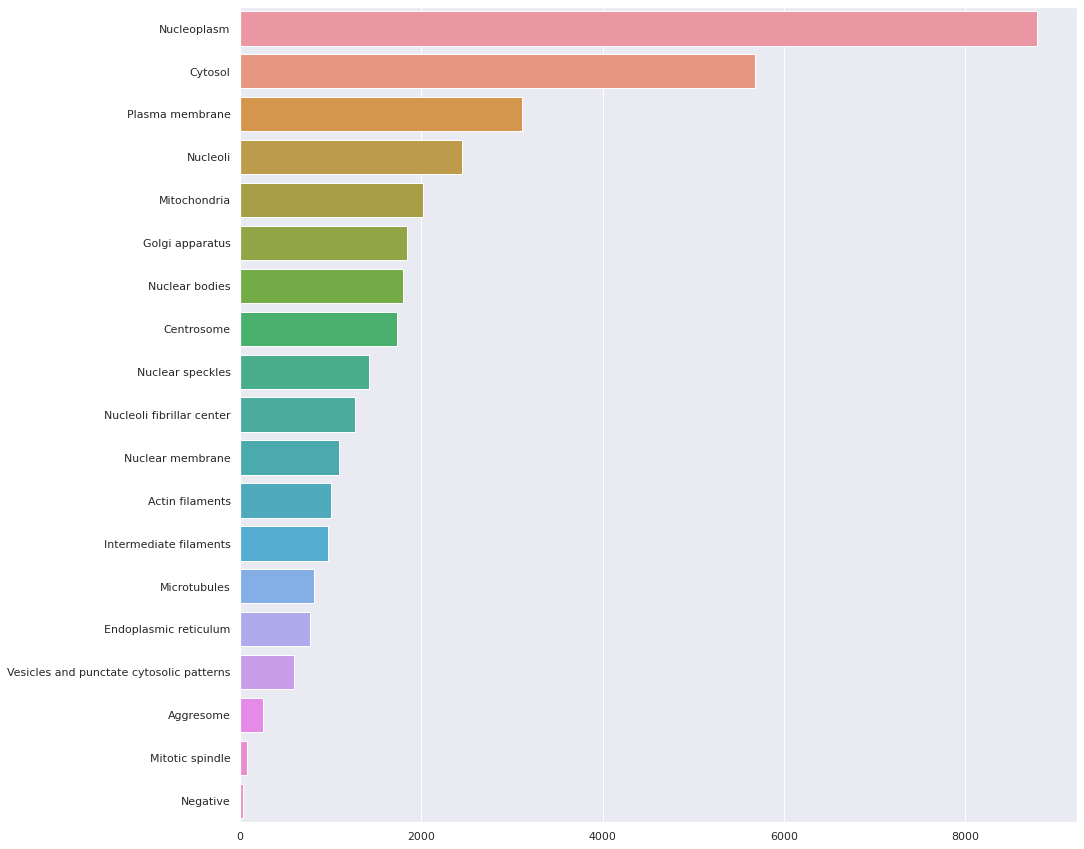

In [16]:
target_counts = train_labels.drop(["ID", "Label"],axis=1).sum(axis=0).sort_values(ascending=False)
plt.figure(figsize=(15,15))
sns.barplot(y=target_counts.index.values, x=target_counts.values, order=target_counts.index)

In [17]:
#green filter for the target protein structure of interest
#blue landmark filter for the nucleus
#red landmark filter for microtubules
#yellow landmark filter for the endoplasmatic reticulum

from os import listdir

files = listdir("./train20images")
for n in range(20):
    print(files[n])

000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_blue.png
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_green.png
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_red.png
000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_yellow.png
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0_blue.png
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0_green.png
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0_red.png
000a9596-bbc4-11e8-b2bc-ac1f6b6435d0_yellow.png
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0_blue.png
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0_green.png
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0_red.png
000c99ba-bba4-11e8-b2b9-ac1f6b6435d0_yellow.png
001838f8-bbca-11e8-b2bc-ac1f6b6435d0_blue.png
001838f8-bbca-11e8-b2bc-ac1f6b6435d0_green.png
001838f8-bbca-11e8-b2bc-ac1f6b6435d0_red.png
001838f8-bbca-11e8-b2bc-ac1f6b6435d0_yellow.png
0020af02-bbba-11e8-b2ba-ac1f6b6435d0_blue.png
0020af02-bbba-11e8-b2ba-ac1f6b6435d0_green.png
0020af02-bbba-11e8-b2ba-ac1f6b6435d0_red.png
0020af02-bbba-11e8-b2ba-ac1f6b6435d0_yellow.png


In [18]:
#check if the number of files divided by 4 yields the number of target samples:
len(files) / 4 == train_labels.shape[0]

False

In [19]:
prefiles=[]
for i in [0,4,8,12,16]:
    prefiles.append(files[i].replace('_blue.png','') )
prefiles

['000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0',
 '000a9596-bbc4-11e8-b2bc-ac1f6b6435d0',
 '000c99ba-bba4-11e8-b2b9-ac1f6b6435d0',
 '001838f8-bbca-11e8-b2bc-ac1f6b6435d0',
 '0020af02-bbba-11e8-b2ba-ac1f6b6435d0']

In [20]:
train_labels=train_labels[train_labels['ID'].isin(prefiles)]
train_labels

,ID,Label,Nucleoplasm,Nuclear membrane,Nucleoli,Nucleoli fibrillar center,Nuclear speckles,Nuclear bodies,Endoplasmic reticulum,Golgi apparatus,...,Actin filaments,Microtubules,Mitotic spindle,Centrosome,Plasma membrane,Mitochondria,Aggresome,Cytosol,Vesicles and punctate cytosolic patterns,Negative
760,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,"[7, 1, 2, 0]",1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4372,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,[1],0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14274,0020af02-bbba-11e8-b2ba-ac1f6b6435d0,"[16, 2]",0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18601,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,[5],0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
21402,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,[12],0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [21]:
def load_image(basepath, image_id):
    images = np.zeros(shape=(4,2048,2048))
    images[0,:,:] = imread(basepath + image_id + "_green" + ".png")
    images[1,:,:] = imread(basepath + image_id + "_red" + ".png")
    images[2,:,:] = imread(basepath + image_id + "_blue" + ".png")
    images[3,:,:] = imread(basepath + image_id + "_yellow" + ".png")
    return images

def make_image_row(image, subax, title):
    subax[0].imshow(image[0], cmap="Greens")
    subax[1].imshow(image[1], cmap="Reds")
    subax[1].set_title("stained microtubules")
    subax[2].imshow(image[2], cmap="Blues")
    subax[2].set_title("stained nucleus")
    subax[3].imshow(image[3], cmap="Oranges")
    subax[3].set_title("stained endoplasmatic reticulum")
    subax[0].set_title(title)
    return subax

def make_title(file_id):
    file_targets = train_labels.loc[train_labels.ID==file_id, "Label"].values[0]
    title = " - "
    for n in file_targets:
        title += label_names[n] + " - "
    return title

In [33]:
class TargetGroupIterator:
    
    def __init__(self, target_names, batch_size, basepath):
        self.target_names = target_names
        self.target_list = [reverse_train_labels[key] for key in target_names]
        self.batch_shape = (batch_size, 4, 2048, 2048)
        self.basepath = basepath
    
    def find_matching_data_entries(self):
        train_labels["check_col"] = train_labels.Label.apply(
            lambda l: self.check_subset(l)
        )
        self.images_identifier = train_labels[train_labels.check_col==1].ID.values
        train_labels.drop("check_col", axis=1, inplace=True)
    
    def check_subset(self, targets):
        return np.where(set(self.target_list).issubset(set(targets)), 1, 0)
    
    def get_loader(self):
        filenames = []
        idx = 0
        images = np.zeros(self.batch_shape)
        for image_id in self.images_identifier:
            images[idx,:,:,:] = load_image(self.basepath, image_id)
            filenames.append(image_id)
            idx += 1
            if idx == self.batch_shape[0]:
                yield filenames, images
                filenames = []
                images = np.zeros(self.batch_shape)
                idx = 0
        if idx > 0:
            yield filenames, images
            

In [49]:
my_choice = ["Nucleoli"]
my_batch_size = 2
train_path="./train20images/"

In [50]:
imageloader = TargetGroupIterator(my_choice, my_batch_size, train_path)
imageloader.find_matching_data_entries()
iterator = imageloader.get_loader()

['000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0', '0020af02-bbba-11e8-b2ba-ac1f6b6435d0']
['000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0', '0020af02-bbba-11e8-b2ba-ac1f6b6435d0']


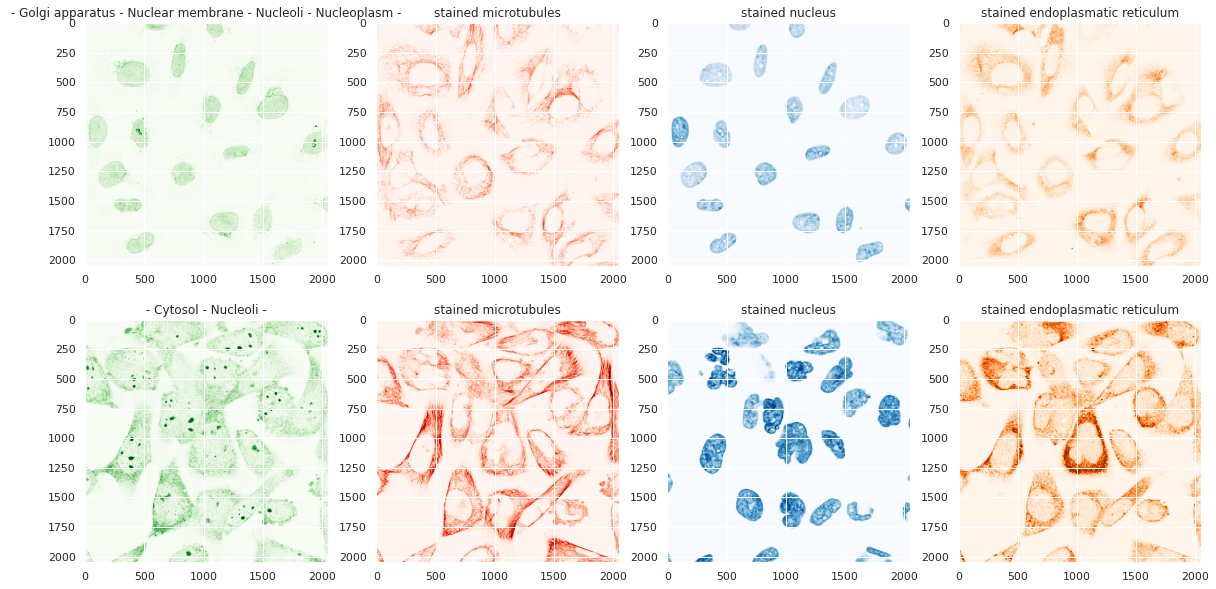

In [51]:
file_ids, images = next(iterator)

fig, ax = plt.subplots(len(file_ids),4,figsize=(20,5*len(file_ids)))
if ax.shape == (4,):
    ax = ax.reshape(1,-1)
for n in range(len(file_ids)):
    print(file_ids)
    make_image_row(images[n], ax[n], make_title(file_ids[n]))

In [ ]:
#rescale the image, if it was not installed in your case
!pip install pillow

In [ ]:
from PIL import Image
import os

In [ ]:
path1 = "training20images"    
path2 = "resized_train_images" 

size = (560,100)
listing = os.listdir(path1)    

for file in listing:
    im = Image.open(path1 + "/" +file)    
    im = im.resize(size)                            
    im.save(path2 + "/" +file, "png")

In [ ]:
print("")